In [1]:
#create a random constraint
n = 77
m = 133
A = []
for i in range(m):
    row = [1,1,1]
    row.extend([0 for i in range(n-3)])
    row

    sage.misc.prandom.shuffle(row)
    A.append(row)
    
A = matrix(A).T

p = MixedIntegerLinearProgram(maximization=True, solver='ppl')
x = p.new_variable(nonnegative=True)
p.set_objective(sum(x[i]for i in range(m)))
p.add_constraint(A*x<=1)
v = p.solve()
v
#are getting some pretty strange denominators.

/usr/local/Caskroom/miniconda/base/envs/sage/lib/python3.9/site-packages/sage/misc/prandom.py:151: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  return _pyrand().shuffle(x, random)


819401/33211

In [157]:
def rand_3_match(m,n):
    A = []
    for i in range(m):
        row = [1,1,1]
        row.extend([0 for i in range(n-3)])
        row

        sage.misc.prandom.shuffle(row)
        A.append(row)
    
    A = matrix(A).T

    p = MixedIntegerLinearProgram(maximization=True, solver='ppl')
    x = p.new_variable(nonnegative=True)
    p.set_objective(sum(x[i]for i in range(m)))
    p.add_constraint(A*x<=1)
    v = p.solve()
    return v

In [166]:
num_trials = 20
upper = 200
biggest_denoms = []
for n in range(3,upper):
    m = 2*n + 1
    denoms = []
    for trial in range(num_trials):
        v = rand_3_match(m,n)
        v = denominator(v)
        denoms.append(v)
    print("n: ", n, "denom: ", max(denoms))
    biggest_denoms.append(max(denoms))



n:  3 denom:  1
n:  4 denom:  3
n:  5 denom:  3
n:  6 denom:  4
n:  7 denom:  3
n:  8 denom:  5
n:  9 denom:  7
n:  10 denom:  5
n:  11 denom:  8
n:  12 denom:  15
n:  13 denom:  6
n:  14 denom:  8
n:  15 denom:  15
n:  16 denom:  13
n:  17 denom:  32
n:  18 denom:  22
n:  19 denom:  28
n:  20 denom:  19
n:  21 denom:  35
n:  22 denom:  25
n:  23 denom:  26
n:  24 denom:  44
n:  25 denom:  7
n:  26 denom:  53
n:  27 denom:  196
n:  28 denom:  73
n:  29 denom:  28
n:  30 denom:  125
n:  31 denom:  73
n:  32 denom:  92
n:  33 denom:  287
n:  34 denom:  215
n:  35 denom:  309
n:  36 denom:  287
n:  37 denom:  146
n:  38 denom:  236
n:  39 denom:  252
n:  40 denom:  369
n:  41 denom:  448
n:  42 denom:  695
n:  43 denom:  1231
n:  44 denom:  1426
n:  45 denom:  534
n:  46 denom:  2336
n:  47 denom:  977
n:  48 denom:  1111
n:  49 denom:  8450
n:  50 denom:  2379
n:  51 denom:  1199
n:  52 denom:  3653
n:  53 denom:  3994
n:  54 denom:  787
n:  55 denom:  4133
n:  56 denom:  2320
n:  57 den

KeyboardInterrupt: 

In [154]:
rand_3_match(9,4)

4/3

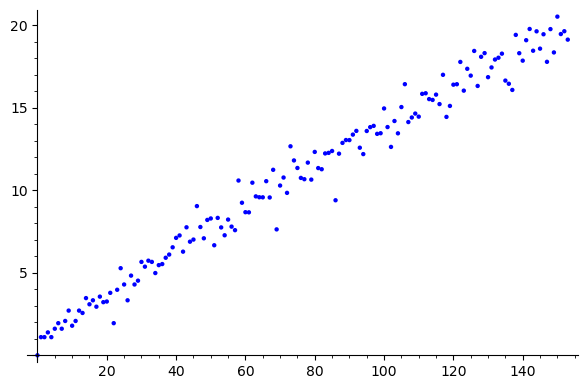

In [167]:
list_plot([log(i) for i in biggest_denoms])